In [633]:
###data processing assoicated package
import pickle
import pprint
import gc 
import datetime
import numpy as np
###drawing package
import os
os.environ['PROJ_LIB'] = 'C:\\Users\\jerry\\anaconda3\\Library\\share\\'
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
import glob
import netCDF4 as nc
import pickle
import csv
import numpy.ma as ma
from skimage import filters

In [659]:
with open('topo_regrid_1km.pkl', 'rb') as f:
    topo = pickle.load(f)

In [635]:
x = np.arange(85.005,205.005,0.01)
y = np.arange(-59.995,60.005,0.01)
local_lon=x[3400:3801]
local_lat=y[8100:8600]
print(local_lon.shape)
hi_lon=x[3350:4350]
hi_lat=y[8100:8600]
print(hi_lon.shape)
#print(hi_lat.shape)
hii_lon=hi_lon[50:451]
print(hii_lon.shape)

(401,)
(1000,)
(401,)


In [29]:
x = np.arange(85.01,205.01,0.02)
y = np.arange(-59.99,60.01,0.02)
local_lon=x[1700:1901]
local_lat=y[4050:4300]
#print(local02_lon.shape)
#print(band13.shape)
hi_lon=x[1675:2175]
hi_lat=y[4050:4300]
print(local_lon.shape)

(201,)


In [3]:
print('ext shape')
x = np.arange(85.0025,205.0025,0.005)
y = np.arange(-59.9975,60.0025,0.005)
#print(x.shape)
#print(y.shape)
local_lon=x[6700:8700]
local_lat=y[16200:17200]

ext shape


In [650]:
fileband=glob.glob('test_vis/test_band02_202002080000.pkl')
with open(fileband[0], 'rb') as f:
        band02= pickle.load(f)

In [24]:
fileband=glob.glob('test_band02_202002080400.pkl')
with open(fileband[0], 'rb') as f:
        band02= pickle.load(f)

In [651]:
print(band02.shape)
print(np.max(band02))
bband02=band02[:,50:451]

(500, 1000)
54.70588


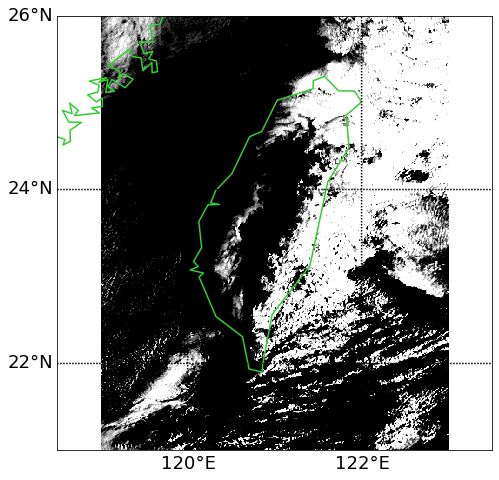

In [652]:
fig = plt.figure(figsize=(8,8)) 
m = Basemap(llcrnrlon=118.5, urcrnrlon=123.5, llcrnrlat=21, urcrnrlat=26,resolution='l')
m.drawcoastlines(linewidth=1.5,color='limegreen')
m.drawparallels(np.arange(22., 27., 2.), labels=[1, 0, 0, 0], linewidth=1.5, color='k', fontsize=18)
m.drawmeridians(np.arange(118., 123., 2.), labels=[0, 0, 0, 1], linewidth=1.5, color='k', fontsize=18)
cmap2 = cm.get_cmap("gray",lut=10)
cmap2.set_under("k")
cmap2.set_over("w")
test=ma.masked_where(bband02<10,bband02)
m.pcolormesh(local_lon,local_lat,bband02,cmap=cmap2,vmin=15,vmax=20)

In [641]:
terr=ma.masked_where(topo<2000,topo)
terrr=ma.masked_where(terr>2700,terr)

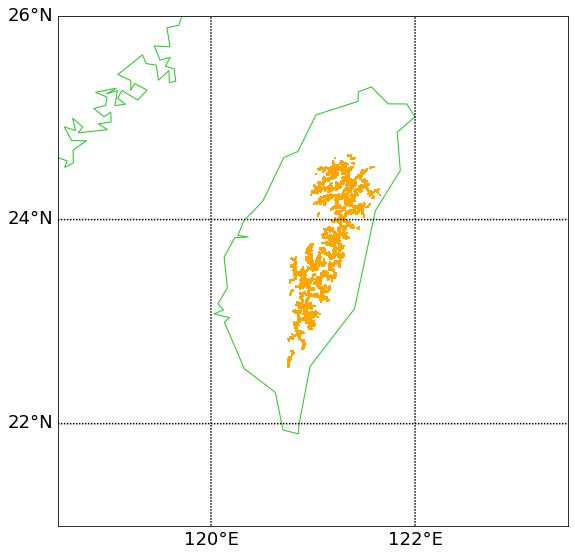

In [642]:
##draw tbb and CloudSat track
fig = plt.figure(figsize=(8,8)) 
m = Basemap(llcrnrlon=118.5, urcrnrlon=123.5, llcrnrlat=21, urcrnrlat=26,resolution='l')
m.drawcoastlines(linewidth=1.1,color='limegreen')
m.drawparallels(np.arange(22., 27., 2.), labels=[1, 0, 0, 0], linewidth=1.5, color='k', fontsize=18)
m.drawmeridians(np.arange(118., 123., 2.), labels=[0, 0, 0, 1], linewidth=1.5, color='k', fontsize=18)

#print(x.shape)
cmap2 = cm.get_cmap("terrain",lut=19)
cmap2.set_under("orange")
cmap2.set_over("k")
#r_tri_tbb_region = tri_tbb_region[::-1]

#m.pcolormesh(llon,llat,aa[0:18001:100,0:14401:100],cmap=cmap2,vmin=0,vmax=3800)#,cmap=cmap2,vmin=200,vmax=300)
m.pcolormesh(local_lon,local_lat,terrr,cmap=cmap2,vmin=4000,vmax=4500)#,cmap=cmap2,vmin=200,vmax=300)
#plt.title('Himawari Band13  '+str(year)+'/'+str(mon)+'/'+str(day)+' UTC '+str(hr)+':' +str(mn)+ '',fontsize=18)
#plt.colorbar()
plt.tight_layout()

In [653]:
print(band02.shape)
bband02=band02[:,50:451]
bband02[bband02>10]=100
edge = filters.sobel(bband02)

(500, 1000)


In [654]:
thesh=filters.threshold_otsu(edge)

In [655]:
thesh1=filters.threshold_otsu(band02)

In [656]:
print(np.max(bband02))

100.0


In [657]:
print(thesh)
print(thesh1)

26.49658
54.674057


In [660]:
print(np.max(topo))

3662.5841049382716


In [661]:
#plt.imshow(topo)

In [662]:
edge[topo<500]=0

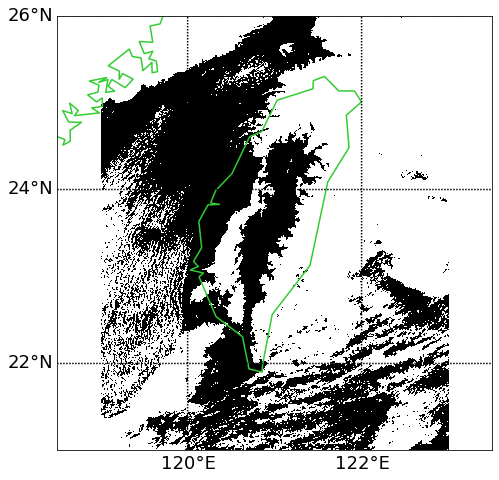

In [663]:
fig = plt.figure(figsize=(8,8)) 
m = Basemap(llcrnrlon=118.5, urcrnrlon=123.5, llcrnrlat=21, urcrnrlat=26,resolution='l')
m.drawcoastlines(linewidth=1.5,color='limegreen')
m.drawparallels(np.arange(22., 27., 2.), labels=[1, 0, 0, 0], linewidth=1.5, color='k', fontsize=18)
m.drawmeridians(np.arange(118., 123., 2.), labels=[0, 0, 0, 1], linewidth=1.5, color='k', fontsize=18)
cmap2 = cm.get_cmap("gray",lut=10)
cmap2.set_under("k")
cmap2.set_over("w")
test=ma.masked_where(bband02<10,bband02)
m.pcolormesh(local_lon,local_lat,bband02,cmap=cmap2,vmin=15,vmax=20)

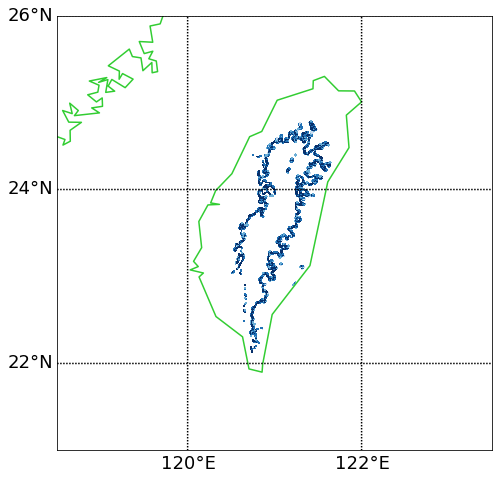

In [673]:
fig = plt.figure(figsize=(8,8)) 
m = Basemap(llcrnrlon=118.5, urcrnrlon=123.5, llcrnrlat=21, urcrnrlat=26,resolution='l')
m.drawcoastlines(linewidth=1.5,color='limegreen')
m.drawparallels(np.arange(22., 27., 2.), labels=[1, 0, 0, 0], linewidth=1.5, color='k', fontsize=18)
m.drawmeridians(np.arange(118., 123., 2.), labels=[0, 0, 0, 1], linewidth=1.5, color='k', fontsize=18)
cmap2 = cm.get_cmap("Blues",lut=5)
cmap2.set_under("k")
cmap2.set_over("k")
test=ma.masked_where(edge<26.49,edge)
m.pcolormesh(local_lon,local_lat,test,cmap=cmap2,vmin=0,vmax=80)

In [668]:
edge[topo<500]=0
edge[edge<26.49]=0
terr=topo
fog_edge=np.zeros((500,401))

for i in range(20,27):
    bot=50+((i)*100)-50
    top=50+((i)*100)+50
    with open('topo_regrid_1km.pkl', 'rb') as f:
        topo = pickle.load(f)
    terr=topo
    #print(bot)
    #print(top)
    terr[terr<bot]=0
    terr[terr>top]=0
    aaa=terr*edge
    fog_edge[aaa>0]=100
with open('topo_regrid_1km.pkl', 'rb') as f:
    topo = pickle.load(f)

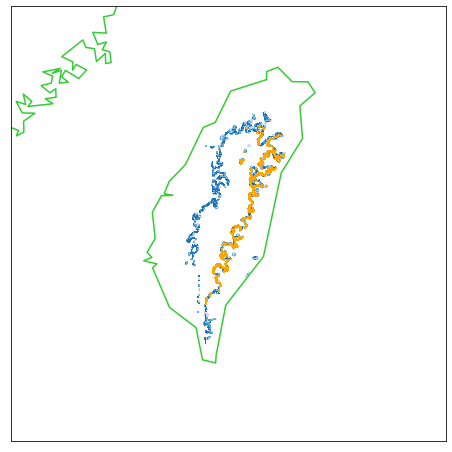

In [671]:
fig = plt.figure(figsize=(8,8)) 
m = Basemap(llcrnrlon=118.5, urcrnrlon=123.5, llcrnrlat=21, urcrnrlat=26,resolution='l')
m.drawcoastlines(linewidth=1.5,color='limegreen')
#m.drawparallels(np.arange(22., 27., 2.), labels=[1, 0, 0, 0], linewidth=1.5, color='k', fontsize=18)
#m.drawmeridians(np.arange(118., 123., 2.), labels=[0, 0, 0, 1], linewidth=1.5, color='k', fontsize=18)
cmap2 = cm.get_cmap("Blues",lut=5)
#cmap2.set_under("w")
#cmap2.set_over("k")
test=ma.masked_where(edge<26.49,edge)
m.pcolormesh(local_lon,local_lat,test,cmap=cmap2,vmin=0,vmax=100)
cmap2 = cm.get_cmap("Blues",lut=5)
cmap2.set_under("w")
cmap2.set_over("orange")
testt=ma.masked_where(fog_edge<50,fog_edge)
m.pcolormesh(local_lon,local_lat,testt,cmap=cmap2,vmin=20,vmax=90)

In [646]:
edge[topo<500]=0
edge[edge<26.49]=0
terr=topo

In [647]:
fog_edge=np.zeros((500,401))

for i in range(0,40):
    bot=50+((i)*100)-50
    top=50+((i)*100)+50
    with open('topo_regrid_1km.pkl', 'rb') as f:
        topo = pickle.load(f)
    terr=topo
    #print(bot)
    #print(top)
    terr[terr<bot]=0
    terr[terr>top]=0
    aaa=terr*edge
    fog_edge[aaa>0]=100

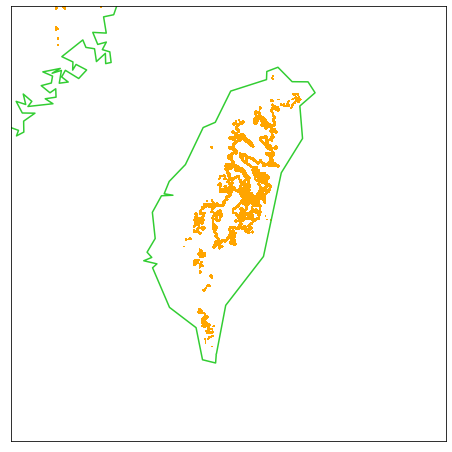

In [649]:
fig = plt.figure(figsize=(8,8)) 
m = Basemap(llcrnrlon=118.5, urcrnrlon=123.5, llcrnrlat=21, urcrnrlat=26,resolution='l')
m.drawcoastlines(linewidth=1.5,color='limegreen')
#m.drawparallels(np.arange(22., 27., 2.), labels=[1, 0, 0, 0], linewidth=1.5, color='k', fontsize=18)
#m.drawmeridians(np.arange(118., 123., 2.), labels=[0, 0, 0, 1], linewidth=1.5, color='k', fontsize=18)
cmap2 = cm.get_cmap("Blues",lut=5)
cmap2.set_under("w")
cmap2.set_over("k")
test=ma.masked_where(edge<26.49,edge)
m.pcolormesh(local_lon,local_lat,test,cmap=cmap2,vmin=50,vmax=100)
cmap2 = cm.get_cmap("Blues",lut=5)
cmap2.set_under("w")
cmap2.set_over("orange")
testt=ma.masked_where(fog_edge<50,fog_edge)
m.pcolormesh(local_lon,local_lat,testt,cmap=cmap2,vmin=20,vmax=90)


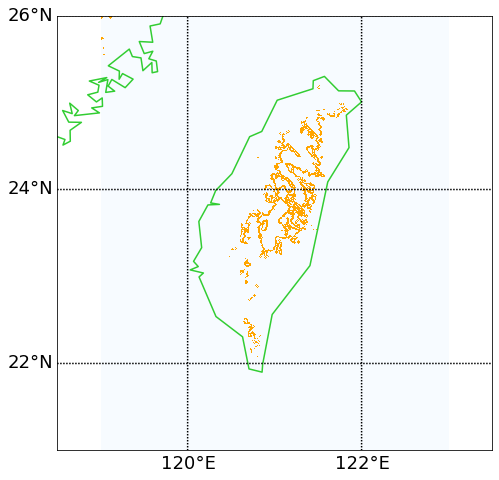

In [632]:
fig = plt.figure(figsize=(8,8)) 
m = Basemap(llcrnrlon=118.5, urcrnrlon=123.5, llcrnrlat=21, urcrnrlat=26,resolution='l')
m.drawcoastlines(linewidth=1.5,color='limegreen')
m.drawparallels(np.arange(22., 27., 2.), labels=[1, 0, 0, 0], linewidth=1.5, color='k', fontsize=18)
m.drawmeridians(np.arange(118., 123., 2.), labels=[0, 0, 0, 1], linewidth=1.5, color='k', fontsize=18)

cmap2 = cm.get_cmap("Blues",lut=5)
cmap2.set_under("k")
cmap2.set_over("k")

m.pcolormesh(local_lon,local_lat,test,cmap=cmap2,vmin=0,vmax=26.49)

cmap2 = cm.get_cmap("Blues",lut=5)
cmap2.set_under("k")
cmap2.set_over("orange")

m.pcolormesh(local_lon,local_lat,fog_edge,cmap=cmap2,vmin=0,vmax=0.5)